In [1]:
import pandas as pd
from fbprophet import Prophet
#df = pd.read_csv('../examples/example_wp_log_peyton_manning.csv')

url = "C:\\Users\\ivonnics\\Documents\\JOSE LUIS\\Cursos Cursera\\Machine Learning\\Example Prophet.csv"
df = pd.read_csv(url)

df.head()

,ds,y
0,12/10/2007,9.590761
1,12/11/2007,8.519590
2,12/12/2007,8.183677
3,12/13/2007,8.072467
4,12/14/2007,7.893572


In [2]:
import fbprophet
fbprophet.__version__

'0.3'

In [3]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.
C:\Users\ivonnics\Anaconda3\envs\PROPHET\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\ivonnics\AppData\Local\Temp\tmpk3hiqwkd\stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_9213453437677225011.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


0.028167503337827665

In [18]:
import holidays

In [19]:
from holidays import HolidayBase, MONDAY, WEEKEND, rd, easter

In [20]:
 from fbprophet.make_holidays import get_holiday_names, make_holidays_df

ModuleNotFoundError: No module named 'fbprophet.make_holidays'

In [7]:
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.
C:\Users\ivonnics\Anaconda3\envs\PROPHET\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\ivonnics\AppData\Local\Temp\tmpbrxkvjkr\stanfit4anon_model_5944b02c79788fa0db5b3a93728ca2bf_4697272647752464731.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


-0.04677873788755958

In [21]:
import pystan
pystan.__version__

'2.17.1.0'

In [22]:
import holidays
holidays.__version__

'0.9.8'

In [23]:
from datetime import date

import holidays

us_holidays = holidays.UnitedStates()
# or:
# us_holidays = holidays.US()
# or:
# us_holidays = holidays.CountryHoliday('US')
# or, for specific prov / states:
# us_holidays = holidays.CountryHoliday('US', prov=None, state='CA')

date(2015, 1, 1) in us_holidays  # True
date(2015, 1, 2) in us_holidays  # False

# The Holiday class will also recognize strings of any format
# and int/float representing a Unix timestamp
'2014-01-01' in us_holidays  # True
'1/1/2014' in us_holidays    # True
1388597445 in us_holidays    # True

us_holidays.get('2014-01-01')  # "New Year's Day"

us_pr_holidays = holidays.UnitedStates(state='PR')  # or holidays.US(...), or holidays.CountryHoliday('US', state='PR')

# some holidays are only present in parts of a country
'2018-01-06' in us_holidays     # False
'2018-01-06' in us_pr_holidays  # True

# Easily create custom Holiday objects with your own dates instead
# of using the pre-defined countries/states/provinces available
custom_holidays = holidays.HolidayBase()
# Append custom holiday dates by passing:
# 1) a dict with date/name key/value pairs,
custom_holidays.append({"2015-01-01": "New Year's Day"})
# 2) a list of dates (in any format: date, datetime, string, integer),
custom_holidays.append(['2015-07-01', '07/04/2015'])
# 3) a single date item
custom_holidays.append(date(2015, 12, 25))

date(2015, 1, 1) in custom_holidays  # True
date(2015, 1, 2) in custom_holidays  # False
'12/25/2015' in custom_holidays      # True

# For more complex logic like 4th Monday of January, you can inherit the
# HolidayBase class and define your own _populate(year) method. See below
# documentation for examples.

True

In [24]:
us_holidays

{datetime.date(2015, 1, 1): "New Year's Day",
 datetime.date(2015, 1, 19): 'Martin Luther King, Jr. Day',
 datetime.date(2015, 2, 16): "Washington's Birthday",
 datetime.date(2015, 5, 25): 'Memorial Day',
 datetime.date(2015, 7, 4): 'Independence Day',
 datetime.date(2015, 7, 3): 'Independence Day (Observed)',
 datetime.date(2015, 9, 7): 'Labor Day',
 datetime.date(2015, 10, 12): 'Columbus Day',
 datetime.date(2015, 11, 11): 'Veterans Day',
 datetime.date(2015, 11, 26): 'Thanksgiving',
 datetime.date(2015, 12, 25): 'Christmas Day',
 datetime.date(2014, 1, 1): "New Year's Day",
 datetime.date(2014, 1, 20): 'Martin Luther King, Jr. Day',
 datetime.date(2014, 2, 17): "Washington's Birthday",
 datetime.date(2014, 5, 26): 'Memorial Day',
 datetime.date(2014, 7, 4): 'Independence Day',
 datetime.date(2014, 9, 1): 'Labor Day',
 datetime.date(2014, 10, 13): 'Columbus Day',
 datetime.date(2014, 11, 11): 'Veterans Day',
 datetime.date(2014, 11, 27): 'Thanksgiving',
 datetime.date(2014, 12, 25): 

In [25]:
date(2015, 1, 2) in us_holidays

False

In [26]:
us_holidays1 = holidays.CountryHoliday('US', prov=None, state='CA')
us_holidays1

{}

In [27]:
1388597445 in us_holidays

True

In [28]:
us_holidays.get('2014-01-01')

"New Year's Day"

In [29]:
# Prophet with Python
m = Prophet(daily_seasonality=True)
m.fit(df)

In [30]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.203683,7.493369,8.882655
3266,2017-01-16,8.528676,7.786848,9.268439
3267,2017-01-17,8.316080,7.586532,9.079120
3268,2017-01-18,8.148680,7.442740,8.875539
3269,2017-01-19,8.160581,7.391402,8.877788


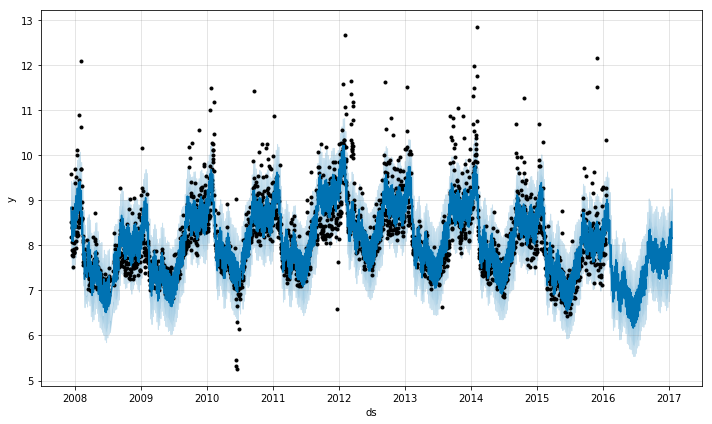

In [32]:
fig1 = m.plot(forecast)

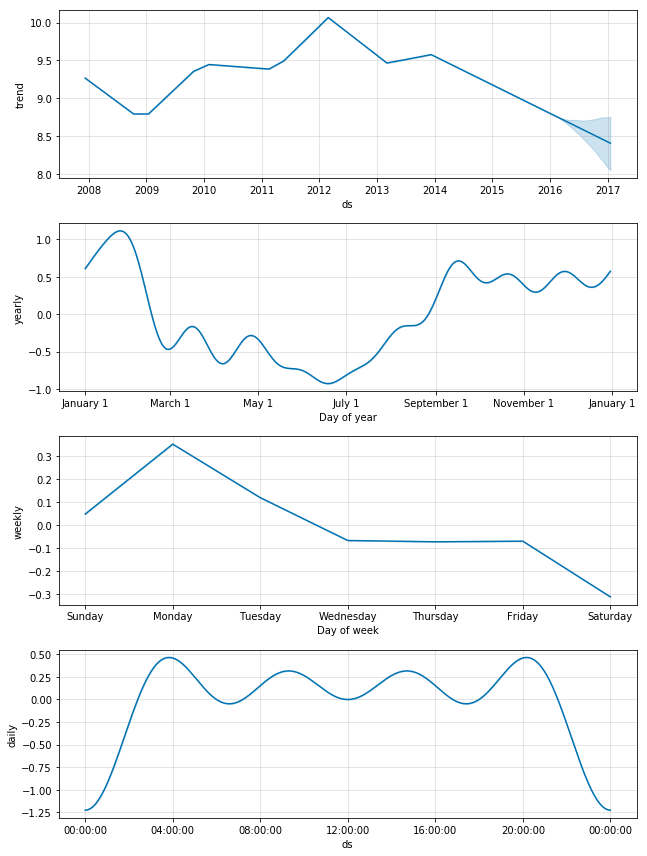

In [33]:
fig2 = m.plot_components(forecast)